In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from pyDOE import lhs
from sympy import DiracDelta, diff, pi
from sympy import *
import numpy as np
from math import erfc
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from torch import autograd
import torch
import torch.nn as nn
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
import torch.optim as optim
from torch.autograd import Variable
import numpy as np
from matplotlib import cm

In [4]:
L=0.00001
M=200
Ws=0.001
Ds=0.0002
mu=0.000005

In [5]:
def data_genf(zs,ze,ts,te,steps):
    L=0.00001
    M=200
    Ws=0.001
    Ds=0.0002
    mu=0.000005
    c=np.zeros((steps,steps))
    z=np.linspace(zs,ze,steps)
    p=np.linspace(ts,te,steps)
    time=np.linspace(ts,te,steps)
    for i in range(steps):
        p[i]=0.0001
    for i in range(steps):
        Y=np.zeros(4000)
        for t in range(steps):
            y=Ip(z[i],time[t],Ws,Ds)
            Y[t]=y
        for t in range(steps):
            pp=0
            for nn in range(0,t+1):
                pp=pp+Y[nn]*p[nn]
            c[i][t]=pp
    return c

In [8]:
c=data_genf(0.1,10,1,3000,100)

In [9]:
c[0][:]

array([1.92515427e-08, 7.25404032e-04, 1.42042458e-03, 2.07780403e-03,
       2.70689737e-03, 3.31483984e-03, 3.90655188e-03, 4.48548392e-03,
       5.05413002e-03, 5.61434603e-03, 6.16754818e-03, 6.71484078e-03,
       7.25710087e-03, 7.79503600e-03, 8.32922479e-03, 8.86014604e-03,
       9.38820004e-03, 9.91372452e-03, 1.04370067e-02, 1.09582928e-02,
       1.14777948e-02, 1.19956968e-02, 1.25121593e-02, 1.30273228e-02,
       1.35413111e-02, 1.40542334e-02, 1.45661866e-02, 1.50772570e-02,
       1.55875216e-02, 1.60970493e-02, 1.66059020e-02, 1.71141354e-02,
       1.76217996e-02, 1.81289402e-02, 1.86355984e-02, 1.91418114e-02,
       1.96476132e-02, 2.01530349e-02, 2.06581047e-02, 2.11628485e-02,
       2.16672898e-02, 2.21714504e-02, 2.26753501e-02, 2.31790073e-02,
       2.36824388e-02, 2.41856600e-02, 2.46886853e-02, 2.51915279e-02,
       2.56941999e-02, 2.61967126e-02, 2.66990766e-02, 2.72013014e-02,
       2.77033961e-02, 2.82053689e-02, 2.87072276e-02, 2.92089794e-02,
      

In [52]:
def data_genf2(zs,ze,zsteps,ts,te,tsteps):#取到对角线元素即可
    L=0.00001
    M=200
    Ws=0.001
    Ds=0.0002
    mu=0.000005
    c=np.zeros((zsteps,tsteps))
    z=np.linspace(zs,ze,zsteps)
    p=np.linspace(ts,te,tsteps)
    time=np.linspace(ts,te,tsteps)
    for i in range(tsteps):
        p[i]=0.0001
    for i in range(zsteps):
        Y=np.zeros(4000)
        for t in range(tsteps):
            y=Ip(z[i],time[t],Ws,Ds)
            Y[t]=y
        for t in range(i+1):
            pp=0
            for nn in range(0,t+1):
                pp=pp+Y[nn]*p[nn]
            c[i][t]=pp
    return c

In [53]:
c2=data_genf2(0.1,10,100,1,3000,100)

In [54]:
c2.diagonal()

array([1.92515427e-08, 2.61678759e-04, 2.36505571e-04, 2.02254271e-04,
       1.68811274e-04, 1.38587467e-04, 1.12922300e-04, 9.16092851e-05,
       7.41282381e-05, 5.98920208e-05, 4.83470584e-05, 3.90085998e-05,
       3.14667635e-05, 2.53816081e-05, 2.04743830e-05, 1.65181012e-05,
       1.33287373e-05, 1.07575134e-05, 8.68436275e-06, 7.01249669e-06,
       5.66394346e-06, 4.57591243e-06, 3.69784558e-06, 2.98903434e-06,
       2.41669727e-06, 1.95443180e-06, 1.58096814e-06, 1.27916708e-06,
       1.03521394e-06, 8.37970432e-07, 6.78453519e-07, 5.49416146e-07,
       4.45010027e-07, 3.60514256e-07, 2.92116873e-07, 2.36738975e-07,
       1.91893054e-07, 1.55568859e-07, 1.26141394e-07, 1.02296756e-07,
       8.29723091e-08, 6.73084316e-08, 5.46095657e-08, 4.43127796e-08,
       3.59623794e-08, 2.91894032e-08, 2.36950520e-08, 1.92373005e-08,
       1.56200716e-08, 1.26844846e-08, 1.03017757e-08, 8.36757117e-09,
       6.79725333e-09, 5.52221008e-09, 4.48679862e-09, 3.64588716e-09,
      

In [43]:
dig=c.diagonal()

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [25]:
Ip(0.3,1,0.001,0.0002)

1.173282300879832e-47

In [26]:
c[2][0]

1.4127512086950158e-10

In [19]:
print(c)

[[0.00000000e+000 0.00000000e+000 0.00000000e+000 ... 0.00000000e+000
  0.00000000e+000 0.00000000e+000]
 [1.82855153e-009 0.00000000e+000 0.00000000e+000 ... 0.00000000e+000
  0.00000000e+000 0.00000000e+000]
 [1.41275121e-010 6.21807869e-007 0.00000000e+000 ... 0.00000000e+000
  0.00000000e+000 0.00000000e+000]
 ...
 [0.00000000e+000 7.29016569e-264 9.82672691e-177 ... 0.00000000e+000
  0.00000000e+000 0.00000000e+000]
 [0.00000000e+000 1.01095715e-268 5.71508206e-180 ... 0.00000000e+000
  0.00000000e+000 0.00000000e+000]
 [0.00000000e+000 1.26433776e-273 3.10260285e-183 ... 0.00000000e+000
  0.00000000e+000 0.00000000e+000]]


考虑原文的方程：
$$
\left\{
\begin{array}{rl}
u_t + {w}_su_z - D_s u_{zz} = 0, & z \in[0,+\infty], ~~ t \in [0, +\infty]\\
u(0, t) = \delta (x)
\end{array}
\right.
$$

原文的数值解：
$$
\begin{aligned}
C(z, t) &=\int_{-\infty}^{t} I_{\mathrm{p}}\left(t-t^{\prime}\right) \times p\left(t^{\prime}\right) \mathrm{d} t^{\prime} \\
&=\int_{-\infty}^{t}\left[\frac{\mathrm{e}^{-\frac{\left(z-w_{s}\left[t-t^{\prime}\right])^{2}\right.}{4 D_{s}\left[t-t^{\prime}\right]}}}{\sqrt{\pi D_{s}\left[t-t^{\prime}\right]}}+\frac{w_{\mathrm{s}}}{2 D_{\mathrm{s}}} \operatorname{erfc}\left(\frac{z-w_{s}\left[t-t^{\prime}\right]}{2 \sqrt{D_{\mathrm{s}}\left[t-t^{\prime}\right]}}\right)\right] p\left(t^{\prime}\right) \mathrm{d} t^{\prime}\\
&=I(z,t)
\end{aligned}
$$

脉冲函数
$$
\begin{array}{rl}
I_{\mathrm{p}}(z, t)=\frac{\mathrm{e}^{-\frac{\left(z-w_{\mathrm{s}} t\right)^{2}}{4 D_{\mathrm{s}} t}}}{\sqrt{\pi D_{\mathrm{s}} t}}+\frac{w_{\mathrm{s}}}{2 D_{\mathrm{s}}} \operatorname{erfc}\left(\frac{z-w_{\mathrm{s}} t}{2 \sqrt{D_{\mathrm{s}} t}}\right)
\end{array}
$$

In [7]:
# ##构建脉冲函数（原方程的数值解）
# def fun1(z,t,ws,ds):
#     stand1=(z-ws)/np.sqrt(4*np.pi*t)
#     return stand1
# def fun2(z,t,ws,ds):
#     Ip=((np.exp(-(fun1(z,t,ws,ds))**2))/(np.sqrt(np.pi*ds*t)))+erfc(fun1(z,t,ws,ds))*ws*0.5/ds
#     return Ip
# def Ip(z,t,ws,ds):
#     return(fun1(z,t,ws,ds)*fun2(z,t,ws,ds))
##构建脉冲函数（原方程的数值解）
def fun1(z,t,ws,ds):
    stand1=(z-ws*t)/np.sqrt(4*ds*t)
    return stand1
def Ip(z,t,ws,ds):
    Ip=((np.exp(-(fun1(z,t,ws,ds))**2))/(np.sqrt(np.pi*ds*t)))+erfc(fun1(z,t,ws,ds))*ws*0.5/ds
    return Ip

In [28]:
# ws=0.03 #Session 4.2
# ds=0.0001#table  1
# Ws=0.001
# Ds=0.0002

In [28]:
Ip(0.1,1800,Ws,Ds)

5.013559882080512

In [36]:
c=data_genf2(0.1,1,10,1,4000,4000)

In [37]:
c.diagonal()

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

旧方法生成的数值解

In [32]:
c2=np.zeros((10,4000))
z=np.linspace(0.1,1,10)
t=np.linspace(1,4000,4000)
for i in range(10):
    for j in range(4000):
        temp=Ip(z[i],t[j],Ws,Ds)
        c2[i][j]=temp

In [33]:
c2.shape

(10, 4000)

## PINN

In [34]:
class Net(nn.Module):
    def __init__(self, NN): # NL n个l（线性，全连接）隐藏层， NN 输入数据的维数， 128 256
        # NL是有多少层隐藏层
        # NN是每层的神经元数量
        super(Net, self).__init__()

        self.input_layer = nn.Linear(2, NN)
        self.hidden_layer1 = nn.Linear(NN,int(NN/2)) ## 原文这里用NN，我这里用的下采样，经过实验验证，“等采样”更优
        self.hidden_layer2 = nn.Linear(int(NN/2), int(NN/2))  ## 原文这里用NN，我这里用的下采样，经过实验验证，“等采样”更优
        self.output_layer = nn.Linear(int(NN/2), 1)

    def forward(self, x): # 一种特殊的方法 __call__() 回调
        out = torch.tanh(self.input_layer(x))
        out = torch.tanh(self.hidden_layer1(out))
        out = torch.tanh(self.hidden_layer2(out))
        out_final = self.output_layer(out)
        return out_final


考虑原文的方程：
$$
\left\{
\begin{array}{rl}
u_t + {w}_su_z - D_s u_{zz} = 0, & z \in[0,+\infty], ~~ t \in [0, +\infty]\\
u(0, t) = \delta (x)
\end{array}
\right.
$$

In [35]:
def pde(x, net):
    u = net(x)  # 神经网络得到的数据
    u_tx = torch.autograd.grad(u, x, grad_outputs=torch.ones_like(net(x)),
                               create_graph=True, allow_unused=True)[0]  # 求偏导数
    d_t = u_tx[:, 0].unsqueeze(-1)#这里设置了t是第一维度
    d_x = u_tx[:, 1].unsqueeze(-1)#设置x是第二维度
    u_xx = torch.autograd.grad(d_x, x, grad_outputs=torch.ones_like(d_x),
                               create_graph=True, allow_unused=True)[0][:,1].unsqueeze(-1)  # 求偏导数

#     ws=0.03 #Session 4.2
#     ds=0.0001#table  1
    Ws=0.001
    Ds=0.0002
    return d_t + Ws * d_x - Ds * u_xx,u  

In [36]:
# 网络的一些参数
net = Net(30)
mse_cost_function = torch.nn.MSELoss(reduction='mean')  # Mean squared error
optimizer = torch.optim.Adam(net.parameters(), lr=1e-3)

In [46]:
cut=data_genf(0,1,100,1,100,100)#生成数据
avaf=cut.diagonal()#取对角
f_ac= Variable(torch.from_numpy(avaf).float(), requires_grad=False)

# # 上次的方法生成的数据
# x=np.linspace(0,1,2000).reshape(2000,1)
# t=np.linspace(1,2000,2000).reshape(2000,1)
# f_out3=np.zeros(2000)
# for i in range(2000):
#     f_out3[i]=Ip(x[i],t[i],Ws,Ds)

In [100]:
a=f_out2.tolist()

In [93]:
ada = Variable(torch.from_numpy(avaf).float(), requires_grad=True)

In [92]:
pt_t_collocation.shape

torch.Size([100, 1])

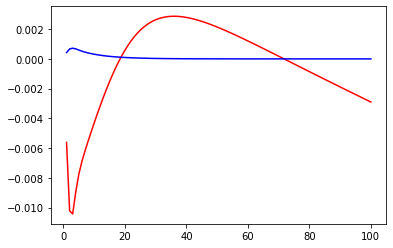

In [103]:
plt.plot(t_collocation,a,color='r',label='net')
plt.plot(t_collocation,avaf,color='b',label='d')

In [48]:
iterations=3000
for epoch in range(iterations):
    optimizer.zero_grad()  # 梯度归0

    # 求边界条件的误差
    # 初始化变量
    t_boundary=np.linspace(1,100,100).reshape(100,1)
    x_boundary=np.zeros(100).reshape(100,1)
    p=np.linspace(1,100,100).reshape(100,1)
    
#根据张教授给的matlab代码的思想 设置了边界
    for i in range(100):
        p[i]=0.00001
    # 将数据转化为torch可用的
    
    pt_x_boundary= Variable(torch.from_numpy(x_boundary).float(), requires_grad=False)
    pt_t_boundary = Variable(torch.from_numpy(t_boundary).float(), requires_grad=False)
    pt_u_boundary = Variable(torch.from_numpy(p).float(), requires_grad=False)

    # 求边界条件的损失
    net_b_out = net(torch.cat([ pt_t_boundary, pt_x_boundary], 1))  # u(x,t)的输出
    mse_u_2 = mse_cost_function(net_b_out, pt_u_boundary)  # e = u(x,t)-边界的值  公式（2）
    
    # 求PDE函数式的误差
    # 初始化变量
    x_collocation =np.linspace(0,1,100).reshape(100,1)
    t_collocation =np.linspace(1,100,100).reshape(100,1)
    all_zeros = np.zeros((100, 1))
    pt_all_zeros = Variable(torch.from_numpy(all_zeros).float(), requires_grad=False)
    pt_x_collocation = Variable(torch.from_numpy(x_collocation).float(), requires_grad=True)
    pt_t_collocation = Variable(torch.from_numpy(t_collocation).float(), requires_grad=True)
 

    # 将变量x,t带入公式（1）
    f_out,f_out2 = pde(torch.cat([pt_t_collocation, pt_x_collocation], 1), net) 
    #torch.cat([,],1)将两个向量按第一维度链接起来
    # output of f(x,t) 公式（1）
    mse_f_1 = mse_cost_function(f_out, pt_all_zeros)
    mse_u_3=mse_cost_function(f_out2,f_ac)#这个将神经网络得到的真实值与实际的真实值相比较
    # 将误差(损失)累加起来
    loss = mse_f_1 + mse_u_2+mse_u_3

    loss.backward()  # 反向传播
    optimizer.step()  # This is equivalent to : theta_new = theta_old - alpha * derivative of J w.r.t theta

    with torch.autograd.no_grad():
        if epoch % 100 == 0:
            print(epoch, "Traning Loss:", loss.data)

E:\Anaconda\lib\site-packages\torch\nn\modules\loss.py:529: UserWarning: Using a target size (torch.Size([100])) that is different to the input size (torch.Size([100, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


0 Traning Loss: tensor(37.5995)
100 Traning Loss: tensor(0.0194)
200 Traning Loss: tensor(0.0064)
300 Traning Loss: tensor(0.0028)
400 Traning Loss: tensor(0.0014)
500 Traning Loss: tensor(0.0007)
600 Traning Loss: tensor(0.0004)
700 Traning Loss: tensor(0.0003)
800 Traning Loss: tensor(0.0002)
900 Traning Loss: tensor(0.0001)
1000 Traning Loss: tensor(9.9185e-05)
1100 Traning Loss: tensor(8.3793e-05)
1200 Traning Loss: tensor(7.3439e-05)
1300 Traning Loss: tensor(6.5708e-05)
1400 Traning Loss: tensor(5.9444e-05)
1500 Traning Loss: tensor(5.4097e-05)
1600 Traning Loss: tensor(4.9403e-05)
1700 Traning Loss: tensor(4.5228e-05)
1800 Traning Loss: tensor(4.1491e-05)
1900 Traning Loss: tensor(3.8142e-05)
2000 Traning Loss: tensor(3.5139e-05)
2100 Traning Loss: tensor(3.2448e-05)
2200 Traning Loss: tensor(3.0036e-05)
2300 Traning Loss: tensor(2.7877e-05)
2400 Traning Loss: tensor(2.5945e-05)
2500 Traning Loss: tensor(2.4216e-05)
2600 Traning Loss: tensor(2.2670e-05)
2700 Traning Loss: tensor

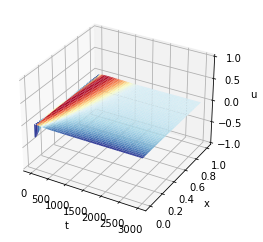

In [49]:
## 画图 ##
t = np.linspace(0, 3000, 2000)
x = np.linspace(0, 1, 256)
ms_t, ms_x = np.meshgrid(t, x)
# x,t的坐标以及将其Meshgrid

x = np.ravel(ms_x).reshape(-1, 1)
t = np.ravel(ms_t).reshape(-1, 1)
pt_x = Variable(torch.from_numpy(x).float(), requires_grad=True)
pt_t = Variable(torch.from_numpy(t).float(), requires_grad=True)
pt_u0 = net(torch.cat([pt_t, pt_x], 1))#训练好的网络
u = pt_u0.data.cpu().numpy()

pt_u0 = u.reshape(256, 2000)

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.set_zlim([-1, 1])
ax.plot_surface(ms_t, ms_x, pt_u0, cmap=cm.RdYlBu_r, edgecolor='blue', linewidth=0.0003, antialiased=True)
ax.set_xlabel('t')
ax.set_ylabel('x')
ax.set_zlabel('u')

array([[0.00000000e+00, 1.50075038e+00, 3.00150075e+00, ...,
        2.99699850e+03, 2.99849925e+03, 3.00000000e+03],
       [0.00000000e+00, 1.50075038e+00, 3.00150075e+00, ...,
        2.99699850e+03, 2.99849925e+03, 3.00000000e+03],
       [0.00000000e+00, 1.50075038e+00, 3.00150075e+00, ...,
        2.99699850e+03, 2.99849925e+03, 3.00000000e+03],
       ...,
       [0.00000000e+00, 1.50075038e+00, 3.00150075e+00, ...,
        2.99699850e+03, 2.99849925e+03, 3.00000000e+03],
       [0.00000000e+00, 1.50075038e+00, 3.00150075e+00, ...,
        2.99699850e+03, 2.99849925e+03, 3.00000000e+03],
       [0.00000000e+00, 1.50075038e+00, 3.00150075e+00, ...,
        2.99699850e+03, 2.99849925e+03, 3.00000000e+03]])